In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df = pd.read_csv('DS project.csv')

In [3]:
# Data Cleaning: Handle missing values and rename columns
df.rename(columns={'Category Rank': 'Rank', 'Enter Your Name': 'Name', 'Preferred Branch at IIITDM': 'Branch', 'Select your state name': 'State', 'Did you got the seat?': 'Output'}, inplace=True)
print(df.shape)
df['Rank'].fillna(df['Rank'].median(), inplace=True)
df=df[~df['Name'].str.isnumeric()]
df.drop_duplicates(subset=['Name'], keep='first', inplace=True)
df.drop_duplicates(subset=['Rank','Category'],inplace=True)
df = df.drop(['Timestamp'], axis=1)
print(df.shape)

(189, 8)
(176, 7)


In [4]:
# Data Transformation: Encode categorical attributes
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Branch'] = label_encoder.fit_transform(df['Branch'])
df['State'] = label_encoder.fit_transform(df['State'])
df['Output'] = label_encoder.fit_transform(df['Output'])

In [5]:
# Remove outliers based on Rank
Q1 = df['Rank'].quantile(0.25)
Q3 = df['Rank'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Rank'] >= lower_bound) & (df['Rank'] <= upper_bound)]

In [6]:
# Split the data into features (X) and the target variable (y)
X = df[['Branch', 'Rank', 'Gender', 'State', 'Category']]
y = df['Output']

# Perform PCA for dimensionality reduction
mean = np.mean(X, axis=0)
# Calculate the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choose the number of components
n_components = 4
top_eigenvectors = eigenvectors[:, :n_components]

# Project the data onto the top principal components
X_pca = np.dot(X, top_eigenvectors)

In [7]:
# Perform Min-Max scaling - Normalization
min_vals = np.min(X_pca, axis=0)
max_vals = np.max(X_pca, axis=0)
X_normalized = (X_pca - min_vals) / (max_vals - min_vals)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

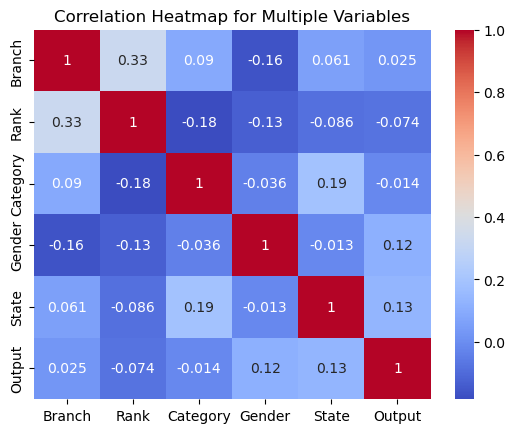

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.iloc[:, 1:].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Multiple Variables")
plt.show()

In [9]:
# Train the Random Forest Classifier on the training set
clf = RandomForestClassifier()
clf.fit(X_train, y_train)#modeling

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
correct_predictions = (y_pred == y_test).sum()
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print("Accuracy:", accuracy)#model evalution
# Train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_normalized, y)

Accuracy: 0.7272727272727273


RandomForestClassifier()

In [10]:
# User input for prediction
name = input('Enter your Name: ')#model development
branch = int(input('Enter your Preferred Branch number:\n0 for CSE\n1 for CSEAI\n2 for ECE\n3 for ME\n'))
rank = int(input('Enter your Category Rank: '))
gender = int(input('Enter Gender number:\n1 for Male\n0 for Female\n'))
location = int(input('Enter number of your state:\n0 for Andhra Pradesh\n1 for Bihar\n3 for Gujarat\n4 for Haryana\n5 for Himachal Pradesh\n6 for Karnataka\n7 for Kerala\n8 for Madhya Pradesh\n9 for Maharashtra\n10 for Odisha\n11 for Punjab\n12 for Rajasthan\n13 for Tamil Nadu\n14 for Telangana\n15 for Uttar Pradesh\n16 for West Bengal\n'))
category = int(input('Enter category number:\n0 for EWS\n1 for General\n2 for OBC\n3 for PwD\n4 for SC\n5 for ST\n'))

# Prepare the user's input data for prediction (excluding 'Name')
user_data = {
    'Branch': [branch],
    'Rank': [rank],
    'Gender': [gender],
    'State': [location],
    'Category': [category],
}

user_data_df = pd.DataFrame(user_data)

# Project user's data onto the top principal components
user_data_pca = np.dot(user_data_df, top_eigenvectors)
user_data_normalized = (user_data_pca - min_vals) / (max_vals - min_vals)

# Use the trained Random Forest model to predict on the user's data
user_prediction = clf.predict(user_data_normalized)
print(user_prediction)
if user_prediction[0] == 1:
    print("Congratulations! You can join the college.")
else:
    print("Sorry, you cannot join the college.")

Enter your Name: 
Enter your Preferred Branch number:
0 for CSE
1 for CSEAI
2 for ECE
3 for ME
0
Enter your Category Rank: 1
Enter Gender number:
1 for Male
0 for Female
1
Enter number of your state:
0 for Andhra Pradesh
1 for Bihar
3 for Gujarat
4 for Haryana
5 for Himachal Pradesh
6 for Karnataka
7 for Kerala
8 for Madhya Pradesh
9 for Maharashtra
10 for Odisha
11 for Punjab
12 for Rajasthan
13 for Tamil Nadu
14 for Telangana
15 for Uttar Pradesh
16 for West Bengal
1
Enter category number:
0 for EWS
1 for General
2 for OBC
3 for PwD
4 for SC
5 for ST
1
[1]
Congratulations! You can join the college.
